<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Box Plots**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize data composition and comparisons using box plots.


### Setup: Connecting to the Database


#### 1. Download the Database File


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-08-06 15:47:09--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-results-public.sqlite’

survey-results-publ 100%[===================>] 201.62M  59.1MB/s    in 3.4s    

2025-08-06 15:47:16 (59.8 MB/s) - ‘survey-results-public.sqlite’ saved [211415040/211415040]



#### 2. Connect to the Database


**Install the needed libraries**


In [2]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 179.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 191.8 MB/s eta 0:00:00


In [3]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 129.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 162.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 48.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 159.0 MB/s eta 0:00:00


In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')


## Demo: Basic SQL Queries


#### Demo 1: Count the Number of Rows in the Table


In [5]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


#### Demo 2: List All Tables


In [6]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


#### Demo 3: Group Data by Age


In [7]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Visualizing Data


### Task 1: Visualizing the Distribution of Data


**1. Box Plot of `CompTotal` (Total Compensation)**


Use a box plot to analyze the distribution and outliers in total compensation.


<Figure size 1200x600 with 0 Axes>

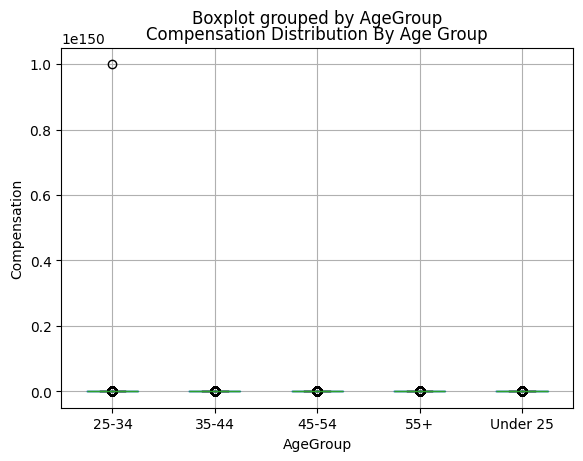

In [9]:
QUERY = """
SELECT
    CASE
        WHEN CAST(Age AS INTEGER) < 25 THEN 'Under 25'
        WHEN CAST(Age AS INTEGER) BETWEEN 25 AND 34 THEN '25-34'
        WHEN CAST(Age AS INTEGER) BETWEEN 35 AND 44 THEN '35-44'
        WHEN CAST(Age AS INTEGER) BETWEEN 45 AND 54 THEN '45-54'
        ELSE '55+'
    END as AgeGroup,
    CompTotal
FROM main
WHERE Age IS NOT NULL AND Age != 'NA' AND CompTotal IS NOT NULL
"""

df_age_comp = pd.read_sql_query(QUERY, conn)

plt.figure(figsize = (12,6))
df_age_comp.boxplot(column = 'CompTotal', by = 'AgeGroup')
plt.ylabel('Compensation')
plt.title('Compensation Distribution By Age Group')
plt.show()

**2. Box Plot of Age (converted to numeric values)**


Convert the `Age` column into numerical values and visualize the distribution.


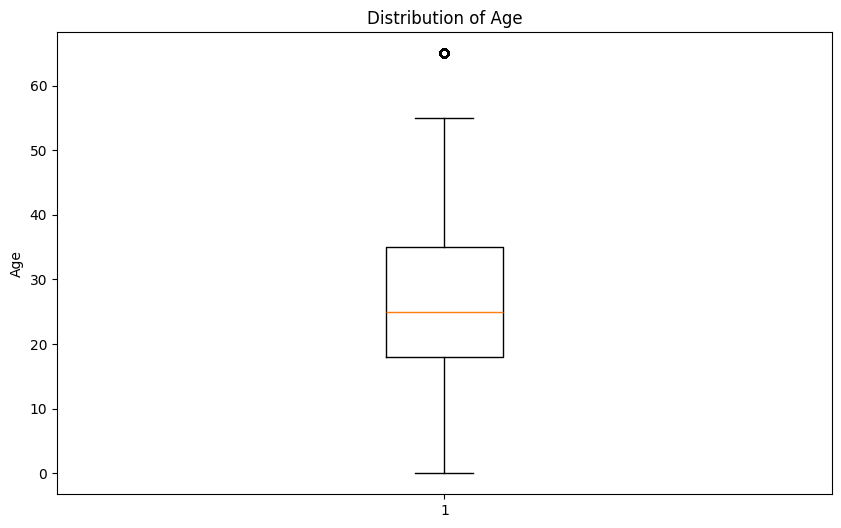

In [11]:
QUERY = "SELECT CAST(Age AS INTEGER) as Age FROM main WHERE Age IS NOT NULL AND Age != 'NA'"
df_age = pd.read_sql_query(QUERY, conn)

plt.figure(figsize = (10,6))
plt.boxplot(df_age['Age'])
plt.ylabel('Age')
plt.title('Distribution of Age')
plt.show()

### Task 2: Visualizing Relationships in Data


**1. Box Plot of `CompTotal` Grouped by Age Groups:**


Visualize the distribution of compensation across different age groups.


<Figure size 1200x600 with 0 Axes>

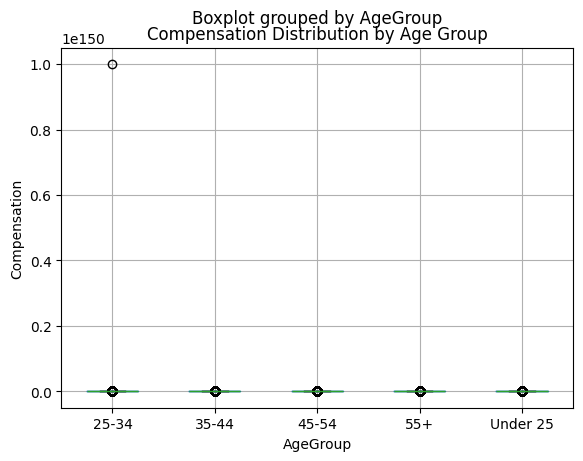

In [13]:
QUERY = """
SELECT
    CASE
        WHEN CAST(Age AS INTEGER) <25 THEN 'Under 25'
        WHEN CAST(Age AS INTEGER) BETWEEN 25 AND 34 THEN '25-34'
        WHEN CAST(Age AS INTEGER) BETWEEN 35 AND 44 THEN '35-44'
        WHEN CAST(Age AS INTEGER) BETWEEN 45 AND 54 THEN '45-54'
        ELSE '55+'
    END as AgeGroup,
    CompTotal
FROM main
WHERE Age IS NOT NULL AND CompTotal IS NOT NULL
"""

df_age_comp = pd.read_sql_query(QUERY, conn)

plt.figure(figsize = (12,6))
df_age_comp.boxplot(column = 'CompTotal', by = 'AgeGroup')
plt.ylabel('Compensation')
plt.title('Compensation Distribution by Age Group')
plt.show()

**2. Box Plot of `CompTotal` Grouped by Job Satisfaction (`JobSatPoints_6`):**


Examine how compensation varies based on job satisfaction levels.


<Figure size 1200x600 with 0 Axes>

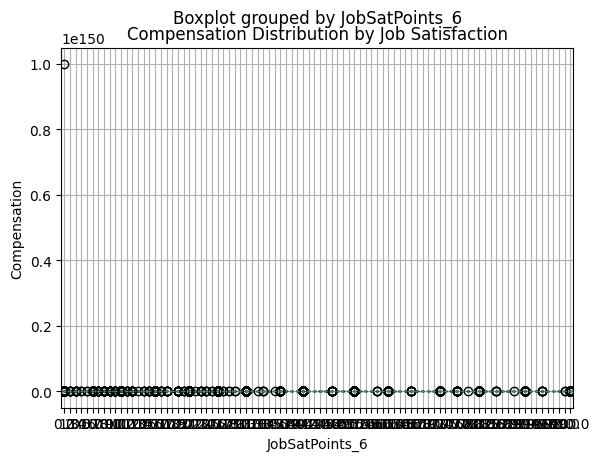

In [14]:
QUERY = """
SELECT JobSatPoints_6, CompTotal
FROM main
WHERE JobSatPoints_6 IS NOT NULL AND CompTotal IS NOT NULL
"""

df_sat_comp = pd.read_sql_query(QUERY, conn)

plt.figure(figsize = (12,6))
df_sat_comp.boxplot(column = 'CompTotal', by = 'JobSatPoints_6')
plt.ylabel('Compensation')
plt.title('Compensation Distribution by Job Satisfaction')
plt.show()

### Task 3: Visualizing the Composition of Data


**1. Box Plot of `ConvertedCompYearly` for the Top 5 Developer Types:**


Analyze compensation across the top 5 developer roles.


<Figure size 1500x600 with 0 Axes>

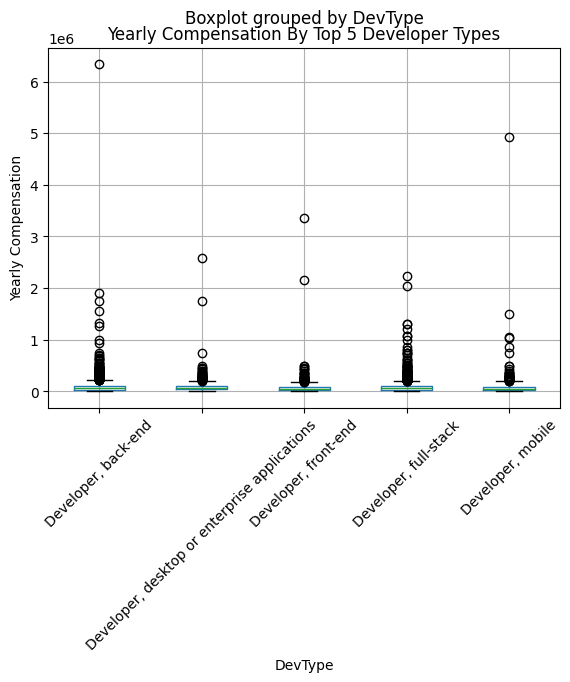

In [17]:
QUERY = """
SELECT DevType, ConvertedCompYearly
FROM main
WHERE DevType IS NOT NULL AND ConvertedCompYearly IS NOT NULL
"""

df_dev = pd.read_sql_query(QUERY, conn)

top_dev_types = df_dev['DevType'].value_counts().head(5).index
df_dev1 = df_dev[df_dev['DevType'].isin(top_dev_types)]

plt.figure(figsize = (15,6))
df_dev1.boxplot(column = 'ConvertedCompYearly', by = 'DevType')
plt.ylabel('Yearly Compensation')
plt.title('Yearly Compensation By Top 5 Developer Types')
plt.xticks(rotation = 45)
plt.show()

**2. Box Plot of `CompTotal` for the Top 5 Countries:**


Analyze compensation across respondents from the top 5 countries.


<Figure size 1500x600 with 0 Axes>

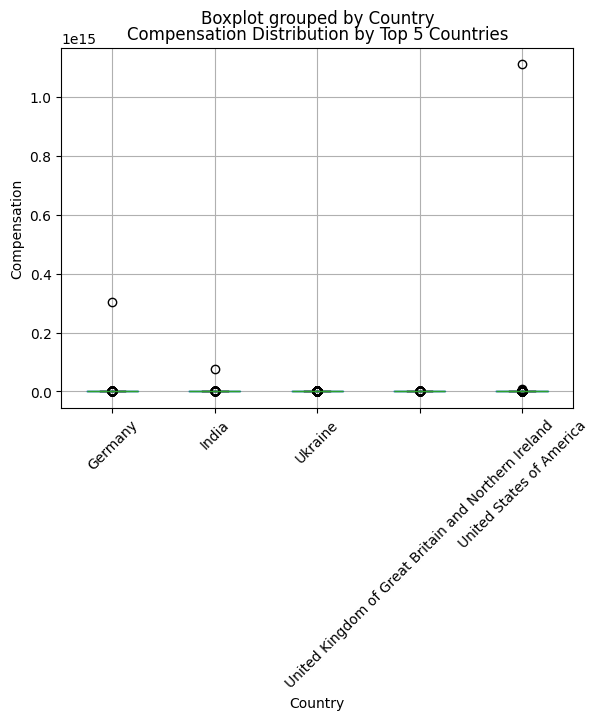

In [18]:
QUERY = """
SELECT Country, CompTotal
FROM main
WHERE Country IS NOT NULL AND CompTotal IS NOT NULL
"""

df_country = pd.read_sql_query(QUERY, conn)

top_countries = df_country['Country'].value_counts().head(5).index
df_country1 = df_country[df_country['Country'].isin(top_countries)]

plt.figure(figsize = (15,6))
df_country1.boxplot(column = 'CompTotal', by = 'Country')
plt.ylabel('Compensation')
plt.title('Compensation Distribution by Top 5 Countries')
plt.xticks(rotation = 45)
plt.show()

### Task 4: Visualizing Comparison of Data


**1. Box Plot of CompTotal Across Employment Types:**


Analyze compensation for different employment types.


<Figure size 1200x600 with 0 Axes>

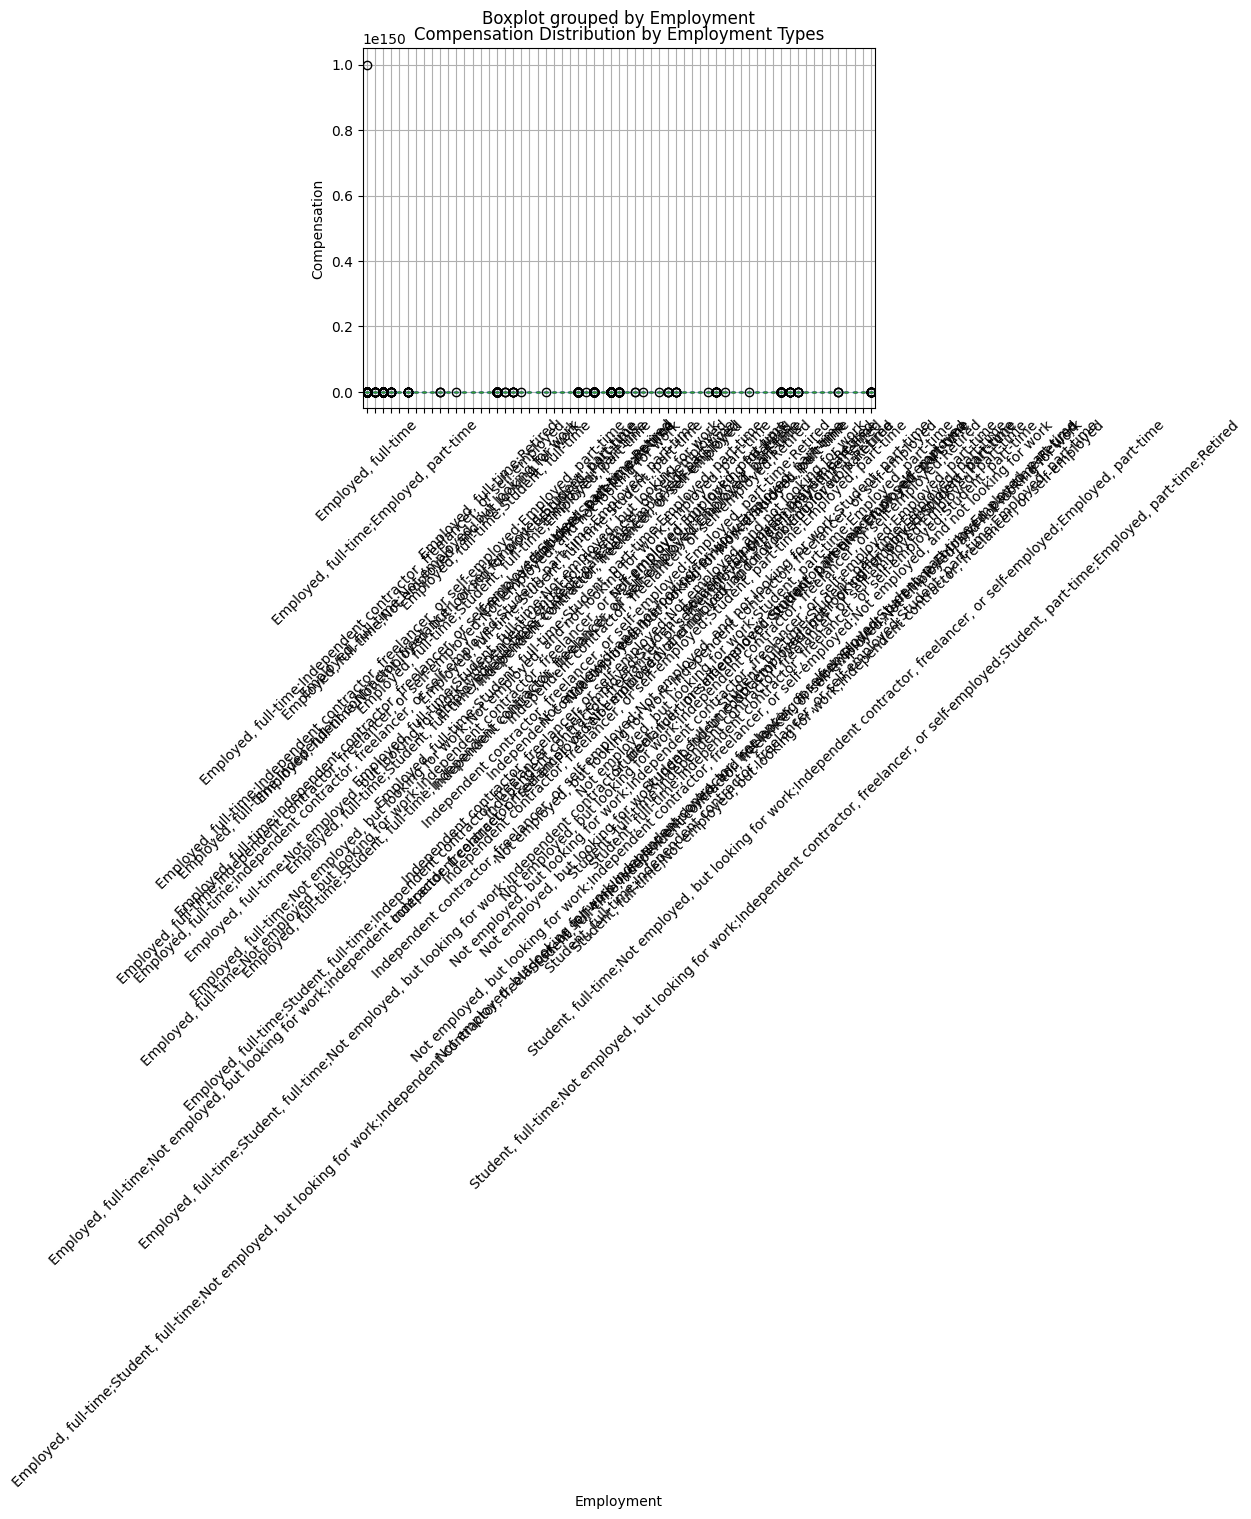

In [19]:
QUERY = """
SELECT Employment, CompTotal
FROM main
WHERE Employment IS NOT NULL AND CompTotal IS NOT NULL
"""

df_emp = pd.read_sql_query(QUERY, conn)

plt.figure(figsize = (12,6))
df_emp.boxplot(column = 'CompTotal', by = 'Employment')
plt.ylabel('Compensation')
plt.title('Compensation Distribution by Employment Types')
plt.xticks(rotation = 45)
plt.show()

**2. Box Plot of `YearsCodePro` by Job Satisfaction (`JobSatPoints_6`):**


Examine the distribution of professional coding years by job satisfaction levels.


In [20]:
QUERY = """
SELECT JobSatPoints_6, CAST(YearsCodePro AS INTEGER) as YearsCodePro
FROM main
WHERE JobSatPoint_6 IS NOT NULL AND YearsCodePro IS NOT NULL AND YearsCodePro != 'NA'
"""

df_ycp_sat = pd.read_sql_query(QUERY, conn)

plt.figure(figsize = (12,6))
df_ycp_sat.boxplot(columns = 'YearsCodePro', by = 'JobSatPoints_6')
plt.ylabel('Years of Professional Coding')
plt.title('Professional Coding Years by Job Satisfaction')
plt.show()

DatabaseError: Execution failed on sql '
SELECT JobSatPoints_6, CAST(YearsCodePro AS INTEGER) as YearsCodePro
FROM main
WHERE JobSatPoint_6 IS NOT NULL AND YearsCodePro IS NOT NULL AND YearsCodePro != 'NA'
': no such column: JobSatPoint_6

### Final Step: Close the Database Connection


After completing the lab, close the connection to the SQLite database:


In [ ]:
conn.close()

## Summary


In this lab, you used box plots to visualize various aspects of the dataset, focusing on:

- Visualize distributions of compensation and age.

- Explore relationships between compensation, job satisfaction, and professional coding experience.

- Analyze data composition across developer roles and countries.

- Compare compensation across employment types and satisfaction levels.

Box plots provided clear insights into the spread, outliers, and central tendencies of various features in the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
